In [1]:
%cd drive/MyDrive/Data

/content/drive/MyDrive/Data


In [2]:
!ls

ExperimentUsers.csv  purchase.csv


In [3]:
#importing related libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


#Loading Datasets and preprocessing

In [4]:
#loading csv fils as a dataframe
df_users = pd.read_csv("ExperimentUsers.csv")
df_pur = pd.read_csv("purchase.csv")

##Users

In [5]:
#droping unnessesary and meaningless columns
df_users.drop('Unnamed: 0',axis=1 , inplace= True)
df_users.tail()

,user_id,group_name
54180,9212735,GroupA
54181,9212736,GroupB
54182,9212741,GroupA
54183,9212750,GroupB
54184,9212756,GroupB


In [6]:
#extracting basic information about users' dataframe
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54185 entries, 0 to 54184
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     54185 non-null  int64 
 1   group_name  54185 non-null  object
dtypes: int64(1), object(1)
memory usage: 846.8+ KB


##Purchase

In [7]:
#dropung meaningless columns
df_pur.drop("Unnamed: 0" , axis = 1 , inplace=True)
df_pur.tail()

,user_id,added_time,price,currency_iso
1102,9185878,2024-05-29 17:40:47.241938+00:00,238.0,IRR
1103,9200495,2024-05-29 20:46:24.718186+00:00,258.0,IRR
1104,9200495,2024-05-29 20:55:52.290650+00:00,798.0,IRR
1105,9140661,2024-05-22 22:17:53.416886+00:00,15.0,IRR
1106,9184960,2024-05-23 17:12:43.915720+00:00,71.8,IRR


In [8]:
#extracting basic information about users' dataframe

df_pur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       1107 non-null   int64  
 1   added_time    1107 non-null   object 
 2   price         1107 non-null   float64
 3   currency_iso  1107 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 34.7+ KB


In [14]:

df_pur.describe()

,user_id,price
count,1.107000e+03,1107.000000
mean,9.165279e+06,412.881147
std,2.405650e+04,538.055429
min,9.128525e+06,0.003980
25%,9.145494e+06,198.000000
50%,9.163367e+06,258.000000
75%,9.185986e+06,438.000000
max,9.212172e+06,5998.000000


In [15]:
#meging two dataframe to get a single dataframe for purchases with group names
df = pd.merge(df_pur, df_users, on='user_id')
df

,user_id,added_time,price,currency_iso,group_name
0,9129408,2024-05-16 09:06:49.178212+00:00,358.0,IRR,GroupA
1,9130127,2024-05-16 08:48:28.419542+00:00,798.0,IRR,GroupB
2,9136778,2024-05-18 13:47:28.460009+00:00,150.0,IRR,GroupA
3,9133384,2024-05-17 13:44:40.406530+00:00,138.0,IRR,GroupA
4,9151973,2024-05-18 22:00:30.568803+00:00,238.0,IRR,GroupB
...,...,...,...,...,...
1102,9185878,2024-05-29 17:40:47.241938+00:00,238.0,IRR,GroupB
1103,9200495,2024-05-29 20:46:24.718186+00:00,258.0,IRR,GroupB
1104,9200495,2024-05-29 20:55:52.290650+00:00,798.0,IRR,GroupB
1105,9140661,2024-05-22 22:17:53.416886+00:00,15.0,IRR,GroupB


In [16]:
#counting number of null values in dataframe (which is zero)
df.isnull().sum()

user_id         0
added_time      0
price           0
currency_iso    0
group_name      0
dtype: int64

In [17]:
#counting number of duplicated values in the dataframe (which is zero and we don't need to remove)
df.duplicated().sum()

0

#EDA

##Calculate basic statistics (mean, median, standard deviation) for the purchase amounts in each group.

In [18]:
grouped = df.groupby("group_name") #group the main dataframe with the group name A
groupA= grouped.get_group("GroupA").reset_index() # And name it a new dataframe named groupA

In [19]:
#extracing mean and median and standard deviation of group A
print("Mean price of Group A:" , groupA["price"] .  mean())
print("Median price of Group A:" ,groupA["price"] . median() )
print("Standard deviation of price in Group A:" ,groupA["price"] .std())

Mean price of Group A: 414.01478346320346
Median price of Group A: 258.0
Standard deviation of price in Group A: 415.55113061290865


In [20]:
groupB= grouped.get_group("GroupB").reset_index() ## and second group and name it a new dataframe named groupB

In [21]:
#extracing mean and median and standard deviation of group B

print("Mean price of Group B:" , groupB["price"] .  mean())
print("Median price of Group B:" ,groupB["price"] . median() )
print("Standard deviation of price in Group B:" ,groupB["price"] .std())

Mean price of Group B: 412.06914728682165
Median price of Group B: 258.0
Standard deviation of price in Group B: 611.2090507514961


##Identify and visualize the distribution of purchases over time.

In [22]:
#change the type of "added_time" column to datetime to work with it better
df['added_time'] = pd.to_datetime(df['added_time'])

In [23]:
#add new columns as  year / month / week / day
df['year'] = df['added_time'].dt.year
df['month'] = df['added_time'].dt.month
df['week'] = df['added_time'].dt.isocalendar().week
df['day'] = df['added_time'].dt.day

In [24]:
#we see that all of our data is in the year 2024
df["year"] . unique()

array([2024], dtype=int32)

In [25]:
#and at the same month
df['month'] . unique()

array([5], dtype=int32)

In [26]:
#and in different three weeks
df['week'].unique()

<IntegerArray>
[20, 21, 22]
Length: 3, dtype: UInt32

In [27]:
#at the end we have the data for only 16 days
len(df['day'] .unique())

16

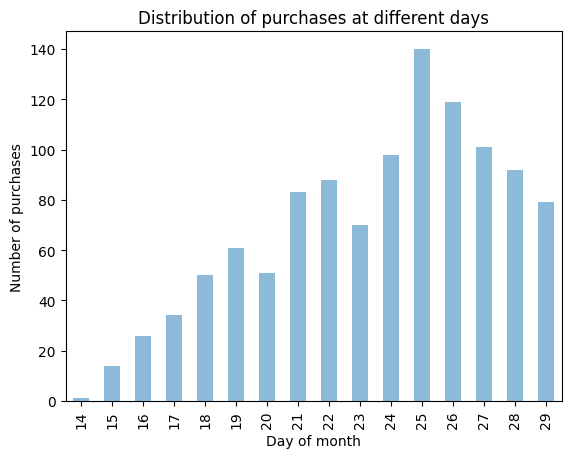

In [28]:
Day = df['day'].value_counts().sort_index() #making a dataframe based on the day and  see the number of purchases per day
Day.plot(kind='bar' , alpha = 0.5) #And plot the bar plot to see the trend in different days

plt.xlabel('Day of month')
plt.ylabel('Number of purchases')
plt.title('Distribution of purchases at different days')
plt.xticks(rotation=90)
plt.show()

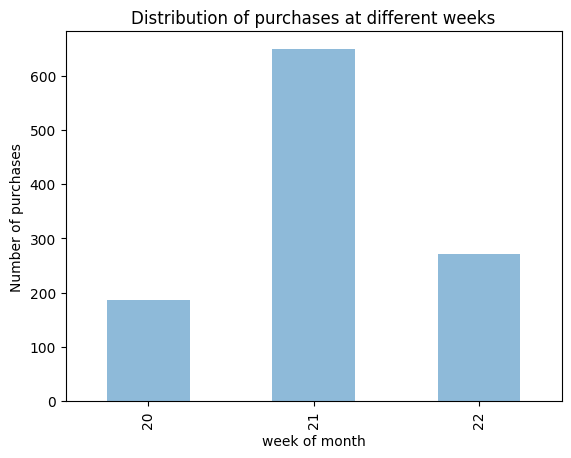

In [29]:
Week = df['week'].value_counts().sort_index() #we can also see the trend in different weeks by doing the same as day
Week.plot(kind='bar' , alpha = 0.5)
plt.xlabel('week of month')
plt.ylabel('Number of purchases')
plt.title('Distribution of purchases at different weeks')
plt.xticks(rotation=90)
plt.show()

##Determine the number of purchases and total revenue for each group

In [30]:
print("total revenue of group A is:", groupA["price"] .sum())
print("total number of purchases of group A is:", groupA["price"] .count())


total revenue of group A is: 191274.82996
total number of purchases of group A is: 462


In [31]:
tot_rev_A= groupA["price"] .sum()
tot_rev_B = groupB["price"] .sum()

if tot_rev_A > tot_rev_B:
  print("total revenue of group A is greater than group B. A-B = " ,tot_rev_A -tot_rev_B)
else:
  print("total revenue of group B is greater than group A. B-A = " ,tot_rev_B -tot_rev_A)

total revenue of group B is greater than group A. B-A =  74509.77003999997


In [32]:
print("total revenue of group B is:", groupB["price"] .sum())
print("total number of purchases of group B is:", groupB["price"] .count())


total revenue of group B is: 265784.6
total number of purchases of group B is: 645


#A/B Test Analysis

##Formulate hypotheses for the A/B test.

###Null Hypothesis $H_0$:



> There is no significant difference in the average purchase
amount between GroupA and GroupB




###Alternative Hypothesis $H_1$:


> There is a significant difference in the average
purchase amount between GroupA and GroupB.



In [33]:
column_to_normalize = 'price'
scaler = MinMaxScaler()
groupA[column_to_normalize] = scaler.fit_transform(groupA[[column_to_normalize]])
groupB[column_to_normalize] = scaler.fit_transform(groupB[[column_to_normalize]])

In [34]:
#in most of the works except medical AB test we use the 0.05 significant level (alpha)
alpha = 0.05

In [35]:
print("mean of group A:" , groupA ["price"] .mean())
print("mean of group B:" , groupB ["price"] .mean())

mean of group A: 0.06902485464857035
mean of group B: 0.06636622886291521


In [36]:
#find the avarage value of prices in different groups and defining variables
avarage_price_GroupA = groupA ["price"] .mean()
avarage_price_GroupB = groupB ["price"] .mean()

####t-test formula
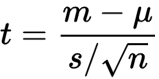

In [37]:
t_statistic, p_value = sci.stats.ttest_ind(groupA["price"],groupB["price"]) #extracting p-value and t-statistics

In [38]:
p_value

0.6276865080308067

In [39]:
t_statistic

0.485121236548362

In [40]:
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


> Group A and B are the same and don't have significant differnce!





##Calculate the conversion rate for each group



> $ Conversion\ Rate = \frac{number\ of\ purchaces}{ numver\ of\ users}$



In [41]:
grouped = df_users.groupby("group_name")
groupA_users = grouped.get_group("GroupA").reset_index() #total number of users in group A

NO_A_users = len(groupA_users )
NO_A_pur = len(groupA) #number of users have purchases in group A
Conversion_rate_A = NO_A_pur /NO_A_users



print("Conversion Rate of Group A is", "{:.2f}".format(Conversion_rate_A *100))

Conversion Rate of Group A is 1.71


In [42]:
grouped = df_users.groupby("group_name")
groupB_users = grouped.get_group("GroupB").reset_index() #total number of users in group B

NO_B_users = len(groupB_users )
NO_B_pur = len(groupB) ##number of users have purchases in group B
Conversion_rate_B = NO_B_pur /NO_B_users


print("Conversion Rate of Group B is", "{:.2f}".format(Conversion_rate_B *100))


Conversion Rate of Group B is 2.38


#Data Visualization

##Create bar charts to compare the average purchase amount and total revenue between the groups.

###average purchase amount

In [43]:
total_purchase_amount_A = groupA.groupby('user_id')['price'].sum() #total amount of purchase by every user in group A
purchase_count_A = groupA.groupby('user_id')['price'].count()      #total number of purchases by every user in group A
average_purchase_amount_A = total_purchase_amount_A / purchase_count_A # avarage amount of purchases by every user in group A
average_purchase_amount_A = average_purchase_amount_A.mean() # Avarage of avarage amount of purchases in group A

In [44]:
total_purchase_amount_B= groupB.groupby('user_id')['price'].sum() #total amount of purchase by every user in group B
purchase_count_B = groupB.groupby('user_id')['price'].count() #total number of purchases by every user in group B
average_purchase_amount_B = total_purchase_amount_B / purchase_count_B  # avarage amount of purchases by every user in group B
average_purchase_amount_B = average_purchase_amount_B . mean()  # Avarage of avarage amount of purchases in group B

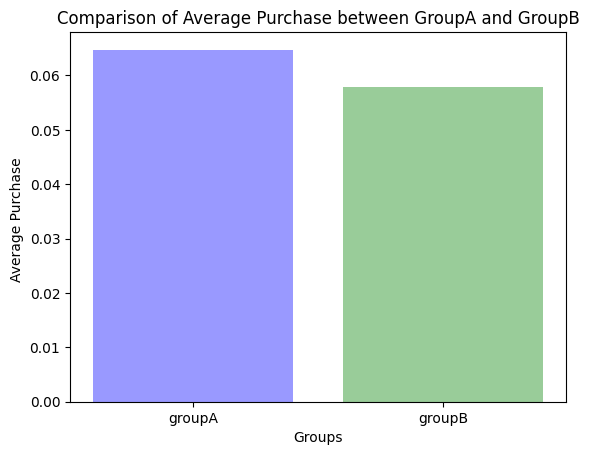

In [45]:
#Comparison of Average Purchase between GroupA and GroupB
group_names = ['groupA', 'groupB']
average_purchase = [average_purchase_amount_B , average_purchase_amount_A]
plt.bar(group_names,average_purchase, color=['blue', 'green'] , alpha=0.4)
plt.xlabel('Groups')
plt.ylabel('Average Purchase ')
plt.title('Comparison of Average Purchase between GroupA and GroupB')
plt.show()

###total revenue

In [47]:
total_revenue_A = groupA["price"].sum() #total revenue in group A
total_revenue_B = groupB["price"].sum() #total revenue in group B

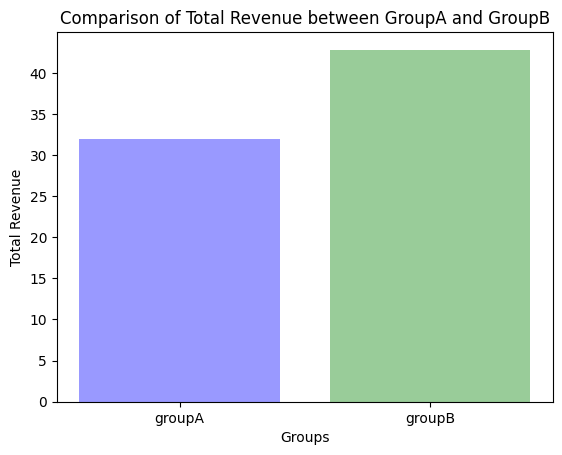

In [48]:
#'Comparison of Total Revenue between GroupA and GroupB
group_names = ['groupA', 'groupB']
total_revenue = [total_revenue_A, total_revenue_B]
plt.bar(group_names, total_revenue, color=['blue', 'green'] , alpha=0.4)
plt.xlabel('Groups')
plt.ylabel('Total Revenue')
plt.title('Comparison of Total Revenue between GroupA and GroupB')
plt.show()

In [ ]:
len(groupB)

645

##Generate time series plots to show purchase trends over time for each group

###Group A

In [49]:
groupA['added_time'] = pd.to_datetime(groupA['added_time']) #"added_time" column from objects to datetime
groupA['day'] = groupA['added_time'].dt.day #we know from latter analysis that our dataset is for 16 days

In [50]:
#exrtacts days and corresponding total price
days_A = groupA.groupby("day")["price"] . sum() . keys()
prices_A = groupA.groupby("day")["price"] . sum() . values

Text(0, 0.5, 'Total Revenue at day')

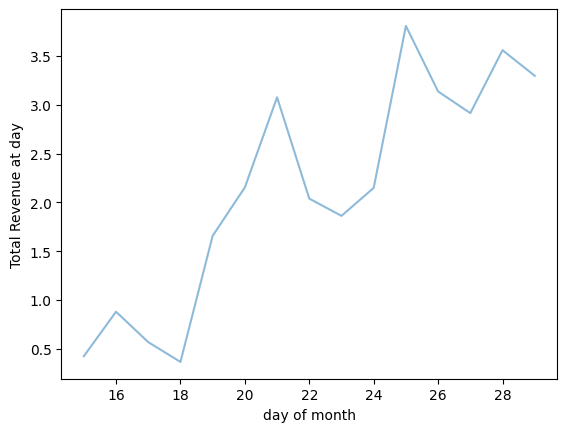

In [51]:
#time series for total price at different days
plt.plot(days_A ,prices_A,alpha = 0.5)
plt.xlabel("day of month")
plt.ylabel('Total Revenue at day')

###Group B

In [52]:
groupB['added_time'] = pd.to_datetime(groupB['added_time']) #"added_time" column from objects to datetime
groupB['day'] = groupB['added_time'].dt.day #we know from latter analysis that our dataset is for 16 days so

In [53]:
#exrtacts days and corresponding total price
days_B = groupB.groupby("day")["price"] . sum() . keys()
prices_B = groupB.groupby("day")["price"] . sum() . values

Text(0, 0.5, 'Total Revenue at day')

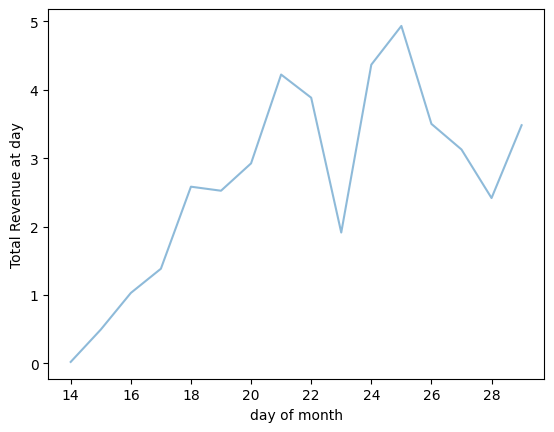

In [54]:
#time series for total price at different days
plt.plot(days_B ,prices_B,alpha = 0.5)
plt.xlabel("day of month")
plt.ylabel('Total Revenue at day')

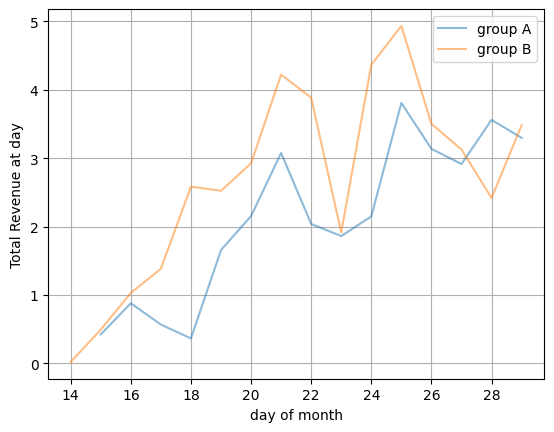

In [55]:
#time series for total price at different days for both groups


plt.plot(days_A ,prices_A,alpha = 0.5)
plt.plot(days_B ,prices_B,alpha = 0.5)

plt.xlabel("day of month")
plt.ylabel('Total Revenue at day')
plt.legend(["group A" , "group B"])
plt.grid()

##Use box plots to visualize the distribution of purchase amounts in each group

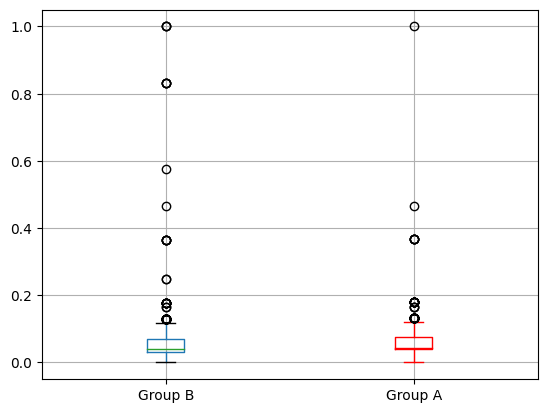

In [56]:
#with outliers
fig, ax = plt.subplots()

box1 = groupB.boxplot(column="price", ax=ax, positions=[1], showfliers=True )
box2 = groupA.boxplot(column="price", ax=ax, positions=[2], color="red", showfliers=True)

ax.set_xticks([1, 2])
ax.set_xticklabels(['Group B', 'Group A'])

plt.show()

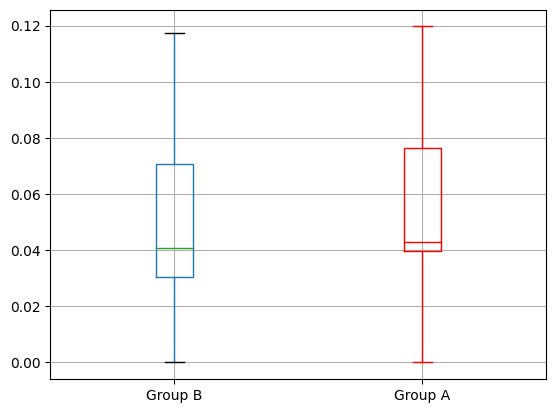

In [57]:
#without outliers
fig, ax = plt.subplots()

box1 = groupB.boxplot(column="price", ax=ax, positions=[1], showfliers=False )
box2 = groupA.boxplot(column="price", ax=ax, positions=[2], color="red", showfliers=False)

ax.set_xticks([1, 2])
ax.set_xticklabels(['Group B', 'Group A'])

plt.show()

In [58]:
# calculate IQR for column Height
Q1 = groupA['price'].quantile(0.25)
Q3 = groupA['price'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers_A =groupA[(groupA['price'] < Q1 - threshold * IQR) | (groupA['price'] > Q3 + threshold * IQR)]

In [59]:
outliers_A.reset_index()

,level_0,index,user_id,added_time,price,currency_iso,group_name,day
0,6,94,9160282,2024-05-21 14:48:09.395222+00:00,0.133044,IRR,GroupA,21
1,7,95,9160282,2024-05-21 14:52:40.278746+00:00,0.179726,IRR,GroupA,21
2,10,98,9160282,2024-05-21 04:24:11.986948+00:00,0.179726,IRR,GroupA,21
3,12,100,9160282,2024-05-28 17:21:10.294231+00:00,0.179726,IRR,GroupA,28
4,16,115,9151039,2024-05-21 17:43:08.649386+00:00,0.133044,IRR,GroupA,21
5,24,181,9210773,2024-05-26 06:03:21.468104+00:00,0.133044,IRR,GroupA,26
6,37,206,9178349,2024-05-27 12:41:30.279306+00:00,0.133044,IRR,GroupA,27
7,39,208,9178349,2024-05-21 12:02:30.282476+00:00,0.133044,IRR,GroupA,21
8,45,214,9136817,2024-05-29 09:48:21.979625+00:00,0.133044,IRR,GroupA,29
9,50,220,9132166,2024-05-15 01:58:36.718133+00:00,0.133044,IRR,GroupA,15


In [60]:
(len(outliers_A) / len(groupA))*100

11.471861471861471

In [61]:
# calculate IQR for column Height
Q1 = groupB['price'].quantile(0.25)
Q3 = groupB['price'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers_B=groupB[(groupB['price'] < Q1 - threshold * IQR) | (groupB['price'] > Q3 + threshold * IQR)]

In [62]:
outliers_B.reset_index()

,level_0,index,user_id,added_time,price,currency_iso,group_name,day
0,0,1,9130127,2024-05-16 08:48:28.419542+00:00,0.130871,IRR,GroupB,16
1,27,30,9132598,2024-05-18 19:31:11.547508+00:00,0.177670,IRR,GroupB,18
2,34,37,9132598,2024-05-21 22:38:33.815016+00:00,0.177670,IRR,GroupB,21
3,46,49,9149918,2024-05-19 07:26:22.363937+00:00,0.164299,IRR,GroupB,19
4,47,50,9149918,2024-05-22 17:30:22.558943+00:00,0.832860,IRR,GroupB,22
...,...,...,...,...,...,...,...,...
59,622,1064,9171240,2024-05-28 06:25:10.760102+00:00,0.130871,IRR,GroupB,28
60,623,1066,9204142,2024-05-28 08:28:26.521807+00:00,0.130871,IRR,GroupB,28
61,633,1091,9202096,2024-05-29 11:34:02.824731+00:00,0.130871,IRR,GroupB,29
62,638,1096,9201144,2024-05-29 19:08:28.940563+00:00,0.130871,IRR,GroupB,29
